# Task 6.2 Exploring Relationships

## This Script Contains:
- Importing Libraries and Dataframe
- Changing Variables - Object/Numeric
    - Checking Variables
    - Assigning numerical values to columns for evaluation
    - Changing Data Types to int64 for Evaluation
- Exploring Relationships
    - Correlations
    - Correlation Observation
- Scatterplot
- Pair Plot
- Categorical Plot
- Reflections & Hypothesis
    - Reflections
    - Hypothesis

### Importing Visualization Libraries and Homicide Data

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path
path = r'/Users/ColinLynt/Documents/CareerFoundry/01-22 Crime Data Analysis'

In [3]:
# Importing homicide report data
df_hr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Homicide_df.pkl'))

In [4]:
# Setting max rows/columns to see 50 rows/columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [5]:
# Checking version of matplotlib
matplotlib.__version__

'3.3.4'

In [6]:
# Checking df_hr
df_hr.head()

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.0,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.0,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0


### Changing Variables - Object / Numeric

#### Cecking Variables

In [7]:
# Checking value counts of Month
df_hr['Month'].value_counts(dropna = False)

July         74920
August       73883
December     70657
September    69413
October      68977
June         68915
May          68639
January      67410
March        65647
April        65227
November     64822
February     59199
Name: Month, dtype: int64

In [8]:
# Checking value counts of Solved
df_hr['Solved'].value_counts(dropna = False)

Yes    580654
No     237055
Name: Solved, dtype: int64

In [9]:
# Checking value counts of VicSex
df_hr['VicSex'].value_counts(dropna = False)

Male       632341
Female     184063
Unknown      1305
Name: VicSex, dtype: int64

In [10]:
# Checking value counts of OffSex
df_hr['OffSex'].value_counts(dropna = False)

Male       515026
Unknown    237359
Female      65324
Name: OffSex, dtype: int64

In [11]:
# Checking value counts of VicRace
df_hr['VicRace'].value_counts(dropna = False)

White                                  404197
Black                                  386078
Asian                                   11778
Unknown                                  9167
American Indian or Alaskan Native        6358
Native Hawaiian or Pacific Islander       131
Name: VicRace, dtype: int64

In [12]:
# Checking value counts of OffRace
df_hr['OffRace'].value_counts(dropna = False)

White                                  281140
Black                                  279080
Unknown                                245166
Asian                                    7206
American Indian or Alaskan Native        4998
Native Hawaiian or Pacific Islander       119
Name: OffRace, dtype: int64

In [13]:
# Checking value counts of Weapon
df_hr['Weapon'].value_counts(dropna = False)

Handgun - pistol, revolver, etc         397571
Knife or cutting instrument             119602
Firearm, type not stated                 73124
Personal weapons, includes beating       47031
Other or type unknown                    42967
Shotgun                                  39205
Blunt object - hammer, club, etc         36041
Rifle                                    30468
Strangulation - hanging                  10083
Fire                                      7722
Asphyxiation - includes death by gas      5011
Other gun                                 3191
Narcotics or drugs, sleeping pills        2780
Drowning                                  1508
Poison - does not include gas              578
Explosives                                 566
Pushed or thrown out window                261
Name: Weapon, dtype: int64

In [14]:
# Checking value counts of Relationship
df_hr['Relationship'].value_counts(dropna = False)

Relationship not determined    313158
Acquaintance                   158549
Stranger                       121155
Other - known to victim         37704
Wife                            30150
Friend                          28231
Girlfriend                      21108
Son                             12876
Other family                    12610
Husband                         12247
Boyfriend                        9588
Daughter                         9334
Neighbor                         8392
Brother                          7165
Father                           5977
Mother                           5825
In-law                           4939
Common-law wife                  3334
Common-law husband               2717
Ex-wife                          2515
Stepfather                       1860
Sister                           1781
Homosexual relationship          1722
Stepson                          1565
Ex-husband                        913
Stepdaughter                      907
Employer    

#### Assigning Numerical Values to Columns for Evaluation

In [15]:
# Assigning numerical value to yes or no in Solved column - No is 0 / Yes is 1
def categories (row):
    if row['Solved'] == 'No':
        return '0'
    elif row ['Solved'] == 'Yes':
        return '1'

In [16]:
# Adding new column NSolved - Gives numerical value to Solved column
df_hr['NSolved'] = df_hr.apply(lambda row : categories(row), axis = 1)

In [17]:
# Assigning numerical value to Months
def categories_2 (row):
    if row['Month'] == 'January':
        return '0'
    elif row ['Month'] == 'February':
        return '1'
    elif row ['Month'] == 'March':
        return '2'
    elif row ['Month'] == 'April':
        return '3'
    elif row ['Month'] == 'May':
        return '4'
    elif row ['Month'] == 'June':
        return '5'
    elif row ['Month'] == 'July':
        return '6'
    elif row ['Month'] == 'August':
        return '7'
    elif row ['Month'] == 'September':
        return '8'
    elif row ['Month'] == 'October':
        return '9'
    elif row ['Month'] == 'November':
        return '10'
    elif row ['Month'] == 'December':
        return '11'

In [18]:
# Adding new column NMonth - Gives numerical value to Month column
df_hr['NMonth'] = df_hr.apply(lambda row : categories_2(row), axis = 1)

In [19]:
# Assigning numerical value to VicSex - 0 is Unknown / 1 is Male / 2 is Female
def categories_3 (row):
    if row['VicSex'] == 'Unknown':
        return '0'
    elif row ['VicSex'] == 'Male':
        return '1'
    elif row ['VicSex'] == 'Female':
        return '2'

In [20]:
# Adding new column NVicSex - Gives numerical value to VicSex column
df_hr['NVicSex'] = df_hr.apply(lambda row : categories_3(row), axis = 1)

In [21]:
# Assigning numerical value to OffSex - 0 is Unknown / 1 is Male / 2 is Female
def categories_4 (row):
    if row['OffSex'] == 'Unknown':
        return '0'
    elif row ['OffSex'] == 'Male':
        return '1'
    elif row ['OffSex'] == 'Female':
        return '2'

In [22]:
# Adding new column NOffSex - Gives numerical value to OffSex column
df_hr['NOffSex'] = df_hr.apply(lambda row : categories_4(row), axis = 1)

In [23]:
# Assigning numerical value to VicRace
def categories_5 (row):
    if row['VicRace'] == 'Unknown':
        return '0'
    elif row ['VicRace'] == 'White':
        return '1'
    elif row ['VicRace'] == 'Black':
        return '2'
    elif row ['VicRace'] == 'Asian':
        return '3'
    elif row ['VicRace'] == 'American Indian or Alaskan Native':
        return '4'
    elif row ['VicRace'] == 'Native Hawaiian or Pacific Islander':
        return '5'

In [24]:
# Adding new column NVicRace - Gives numerical value to VicRace column
df_hr['NVicRace'] = df_hr.apply(lambda row : categories_5(row), axis = 1)

In [25]:
# Assigning numerical value to OffRace
def categories_6 (row):
    if row['OffRace'] == 'Unknown':
        return '0'
    elif row ['OffRace'] == 'White':
        return '1'
    elif row ['OffRace'] == 'Black':
        return '2'
    elif row ['OffRace'] == 'Asian':
        return '3'
    elif row ['OffRace'] == 'American Indian or Alaskan Native':
        return '4'
    elif row ['OffRace'] == 'Native Hawaiian or Pacific Islander':
        return '5'

In [26]:
# Adding new column NOffRace - Gives numerical value to OffRace column
df_hr['NOffRace'] = df_hr.apply(lambda row : categories_6(row), axis = 1)

In [27]:
# Assigning numerical value to Weapon
def categories_7 (row):
    if row['Weapon'] == 'Handgun - pistol, revolver, etc':
        return '0'
    elif row ['Weapon'] == 'Knife or cutting instrument':
        return '1'
    elif row ['Weapon'] == 'Firearm, type not stated':
        return '2'
    elif row ['Weapon'] == 'Personal weapons, includes beating':
        return '3'
    elif row ['Weapon'] == 'Other or type unknown':
        return '4'
    elif row ['Weapon'] == 'Shotgun':
        return '5'
    elif row ['Weapon'] == 'Blunt object - hammer, club, etc':
        return '6'
    elif row ['Weapon'] == 'Rifle':
        return '7'
    elif row ['Weapon'] == 'Strangulation - hanging':
        return '8'
    elif row ['Weapon'] == 'Fire':
        return '9'
    elif row ['Weapon'] == 'Asphyxiation - includes death by gas':
        return '10'
    elif row ['Weapon'] == 'Other gun':
        return '11'
    elif row ['Weapon'] == 'Narcotics or drugs, sleeping pills':
        return '12'
    elif row ['Weapon'] == 'Drowning':
        return '13'
    elif row ['Weapon'] == 'Poison - does not include gas':
        return '14'
    elif row ['Weapon'] == 'Explosives':
        return '15'
    elif row ['Weapon'] == 'Pushed or thrown out window':
        return '16'

In [28]:
# Adding new column NWeapon - Gives numerical value to Weapon column
df_hr['NWeapon'] = df_hr.apply(lambda row : categories_7(row), axis = 1)

In [29]:
# Assigning numerical value to Relationship
def categories_8 (row):
    if row['Relationship'] == 'Relationship not determined':
        return '0'
    elif row ['Relationship'] == 'Acquaintance':
        return '1'
    elif row ['Relationship'] == 'Stranger':
        return '2'
    elif row ['Relationship'] == 'Other - known to victim':
        return '3'
    elif row ['Relationship'] == 'Wife':
        return '4'
    elif row ['Relationship'] == 'Friend':
        return '5'
    elif row ['Relationship'] == 'Girlfriend':
        return '6'
    elif row ['Relationship'] == 'Son':
        return '7'
    elif row ['Relationship'] == 'Other family':
        return '8'
    elif row ['Relationship'] == 'Husband':
        return '9'
    elif row ['Relationship'] == 'Boyfriend':
        return '10'
    elif row ['Relationship'] == 'Daughter':
        return '11'
    elif row ['Relationship'] == 'Neighbor':
        return '12'
    elif row ['Relationship'] == 'Brother':
        return '13'
    elif row ['Relationship'] == 'Father':
        return '14'
    elif row ['Relationship'] == 'Mother':
        return '15'
    elif row ['Relationship'] == 'In-law':
        return '16'
    elif row ['Relationship'] == 'Common-law wife':
        return '17'
    elif row ['Relationship'] == 'Common-law husband':
        return '18'
    elif row ['Relationship'] == 'Ex-wife':
        return '19'
    elif row ['Relationship'] == 'Stepfather':
        return '20'
    elif row ['Relationship'] == 'Sister':
        return '21'
    elif row ['Relationship'] == 'Homosexual relationship':
        return '22'
    elif row ['Relationship'] == 'Stepson':
        return '23'
    elif row ['Relationship'] == 'Ex-husband':
        return '24'
    elif row ['Relationship'] == 'Stepdaughter':
        return '25'
    elif row ['Relationship'] == 'Employer':
        return '26'
    elif row ['Relationship'] == 'Employee':
        return '27'
    elif row ['Relationship'] == 'Stepmother':
        return '28'

In [30]:
# Adding new column NRelationship - Gives numerical value to Relationship column
df_hr['NRelationship'] = df_hr.apply(lambda row : categories_8(row), axis = 1)

In [31]:
# Checking data types
df_hr.dtypes

City              object
State             object
Agency            object
Agentype          object
Solved            object
Year               int64
Month             object
ActionType        object
Homicide          object
Situation         object
VicAge           float64
VicSex            object
VicRace           object
VicEthnic         object
OffAge           float64
OffSex            object
OffRace           object
OffEthnic         object
Weapon            object
Relationship      object
Circumstance      object
VicCount           int64
OffCount           int64
NSolved           object
NMonth            object
NVicSex           object
NOffSex           object
NVicRace          object
NOffRace          object
NWeapon           object
NRelationship     object
dtype: object

#### Changing Data Types to int64 for Evaluation

In [32]:
# Changing NSolved to int64
df_hr['NSolved'] = df_hr['NSolved'].astype('int64')

In [33]:
# Changing NMonth to int64
df_hr['NMonth'] = df_hr['NMonth'].astype('int64')

In [34]:
# Changing NVicSex to int64
df_hr['NVicSex'] = df_hr['NVicSex'].astype('int64')

In [35]:
# Changing NOffSex to int64
df_hr['NOffSex'] = df_hr['NOffSex'].astype('int64')

In [36]:
# Changing NVicRace to int64
df_hr['NVicRace'] = df_hr['NVicRace'].astype('int64')

In [37]:
# Changing NOffRace to int64
df_hr['NOffRace'] = df_hr['NOffRace'].astype('int64')

In [38]:
# Changing NWeapon to int64
df_hr['NWeapon'] = df_hr['NWeapon'].astype('int64')

In [39]:
# Changing NRelationship to int64
df_hr['NRelationship'] = df_hr['NRelationship'].astype('int64')

In [40]:
# Checking data types after changing them
df_hr.dtypes

City              object
State             object
Agency            object
Agentype          object
Solved            object
Year               int64
Month             object
ActionType        object
Homicide          object
Situation         object
VicAge           float64
VicSex            object
VicRace           object
VicEthnic         object
OffAge           float64
OffSex            object
OffRace           object
OffEthnic         object
Weapon            object
Relationship      object
Circumstance      object
VicCount           int64
OffCount           int64
NSolved            int64
NMonth             int64
NVicSex            int64
NOffSex            int64
NVicRace           int64
NOffRace           int64
NWeapon            int64
NRelationship      int64
dtype: object

### Exploring Relationships

#### Correlations:

In [41]:
# Creating a correlation matrix
df_hr.corr()

,Year,VicAge,OffAge,VicCount,OffCount,NSolved,NMonth,NVicSex,NOffSex,NVicRace,NOffRace,NWeapon,NRelationship
Year,1.000000,-0.000605,0.027875,0.036020,0.064509,-0.042602,0.007534,-0.019038,-0.060901,0.051061,-0.030709,-0.034415,-0.074757
VicAge,-0.000605,1.000000,0.324869,-0.022489,-0.034392,-0.001687,-0.002621,0.066933,0.000593,-0.109386,-0.034376,0.056949,0.060719
OffAge,0.027875,0.324869,1.000000,0.008338,-0.162311,-0.001556,0.001909,0.146993,0.020462,-0.065767,-0.068421,0.025605,0.115427
VicCount,0.036020,-0.022489,0.008338,1.000000,0.050950,0.023521,-0.007091,0.087376,0.007122,-0.042316,-0.001394,0.091428,0.033227
OffCount,0.064509,-0.034392,-0.162311,0.050950,1.000000,0.162314,-0.009697,-0.070900,0.125191,-0.006477,0.146057,-0.002374,-0.062220
NSolved,-0.042602,-0.001687,-0.001556,0.023521,0.162314,1.000000,-0.031653,0.080801,0.882690,-0.054613,0.804254,0.029275,0.372505
NMonth,0.007534,-0.002621,0.001909,-0.007091,-0.009697,-0.031653,1.000000,-0.010471,-0.028934,0.002319,-0.025500,-0.004554,-0.018803
NVicSex,-0.019038,0.066933,0.146993,0.087376,-0.070900,0.080801,-0.010471,1.000000,0.062430,-0.074959,0.033412,0.160053,0.190433
NOffSex,-0.060901,0.000593,0.020462,0.007122,0.125191,0.882690,-0.028934,0.062430,1.000000,-0.033791,0.720113,0.046362,0.441620
NVicRace,0.051061,-0.109386,-0.065767,-0.042316,-0.006477,-0.054613,0.002319,-0.074959,-0.033791,1.000000,0.280241,-0.109925,-0.079161


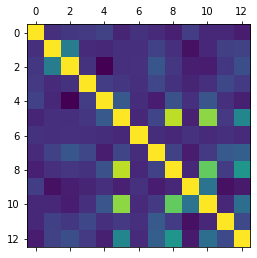

In [42]:
# Creating a correlation heatmap using matplotlib
plt.matshow(df_hr.corr())
plt.show()

In [43]:
# Creating a subset excluding all other columns other than Year, Victims Age, Offenders Age, Victim Count, and Offender Count
sub = df_hr[['Year', 'VicAge', 'OffAge', 'VicCount','OffCount', 'NSolved', 'NMonth', 'NOffSex', 'NVicSex', 'NVicRace', 'NOffRace','NWeapon', 'NRelationship']]

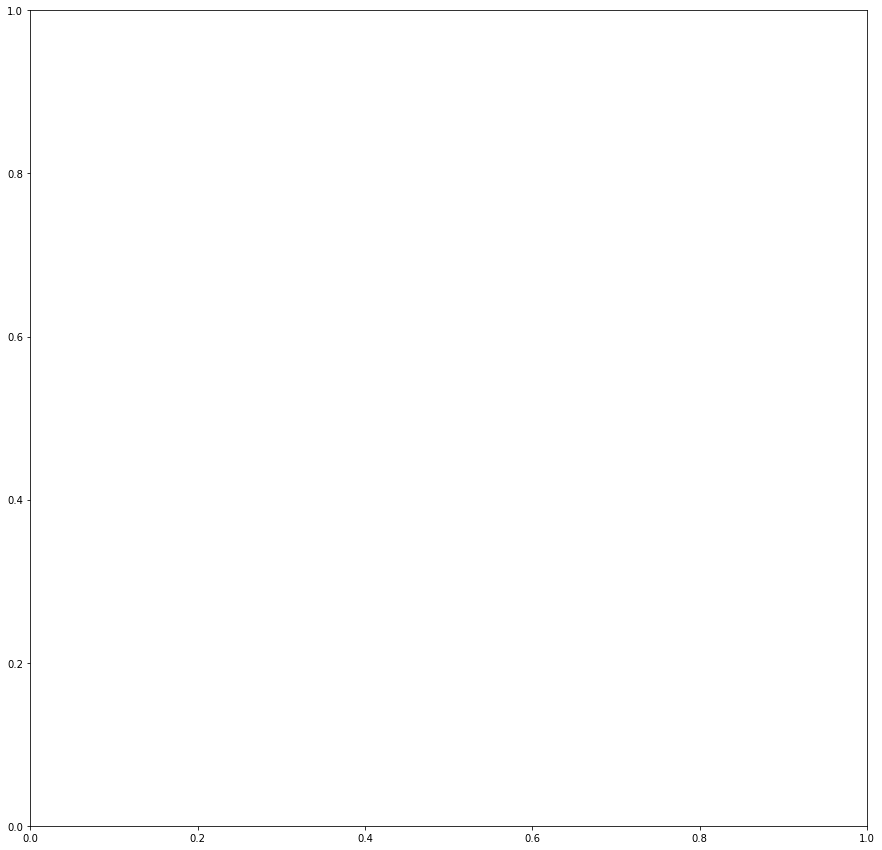

In [44]:
# Creating a subplot with matplotlib
f,ax = plt.subplots(figsize=(15,15))

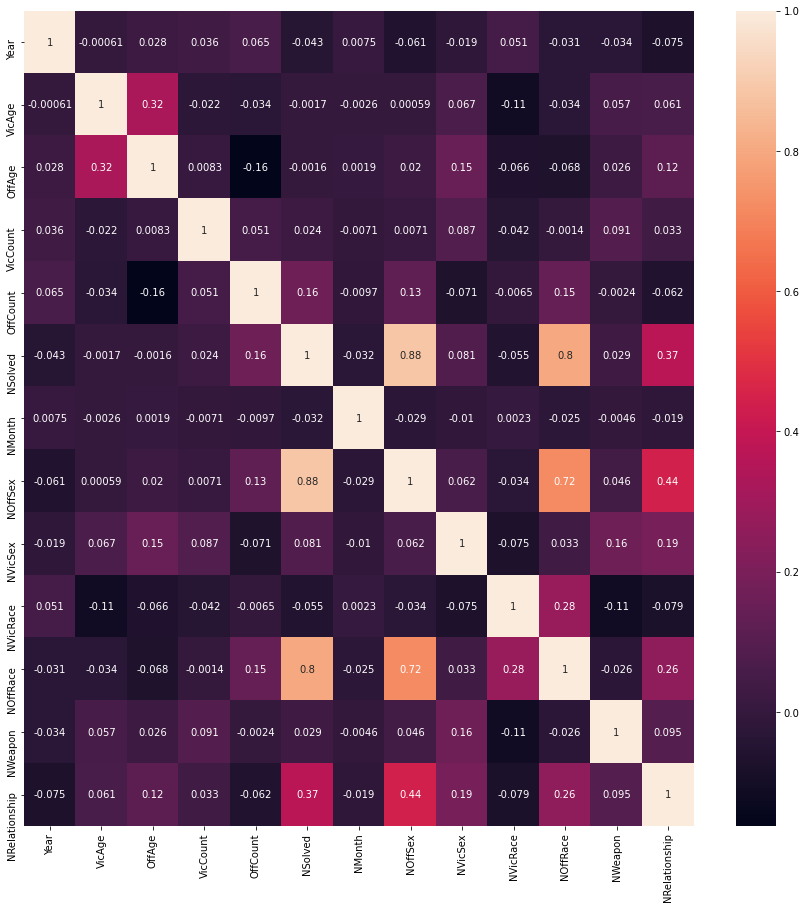

In [45]:
# Creating the correlation heatmap in seaborn 
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
corr.figure

#### Correlation Observation

- There is some correlation between whether the case was solved and Offenders Race. As well as whether the case was solved and Offenders Sex.
- There seems to be a weak correlation between Victiums Age and Offenders Age.
- There seems to be a weak correlation between the Relationship of the victium and offender and offenders sex. As well as whether the case was solved or not.
- There is a somewhat positive correlation between offenders sex and race. 

NOTE: I didn't have much in terms of correlation until I encorperated number values to objects. This may skew the results and can cause issues with the data.

### Scatterplot

#### Explore the correlation between two variables
I'm choosing to look at two variables, offenders sex and whether the case was solved. I have a theory that the reason these two variables are positivly correlated is because the offenders sex is unknown and the case wasn't solved.

NOTE: Technically these variables aren't Int64, so they wont do much. This graphic isn't going to showcase much as it only has a couple of determinations.
- offenders sex: Unknown: 0 | Male: 1 | Female: 2
- Solved: No: 0 | Yes: 1

Text(0.42499999999999716, 0.5, 'Offenders Sex')

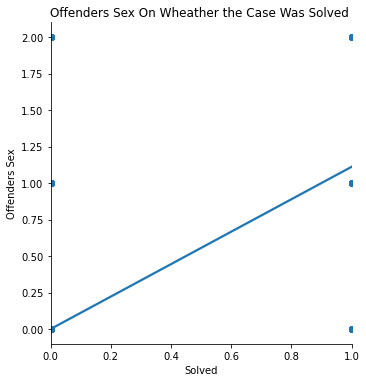

In [46]:
# Creating a Scatterplot
sns.lmplot(x= 'NSolved', y= 'NOffSex', data = df_hr)

plt.title('Offenders Sex On Wheather the Case Was Solved ')
plt.xlabel('Solved')
plt.ylabel('Offenders Sex')

I wanted to check out a lower correlation and see if it would give me a bit more data then the previous data. As it turns out it might have been too much data as it's all clustered. I used height and aspect to change the graph to understand it better. 

There seems to be a very slight correlation between Offenders Age and Victims Age. So when the age of the Offender goes up, so does the Victims.

In [120]:
# Checking value counts of Solved
df_hr['Solved'].value_counts(dropna = False)

Yes    580654
No     237055
Name: Solved, dtype: int64

Text(3.674999999999997, 0.5, 'Offenders Age')

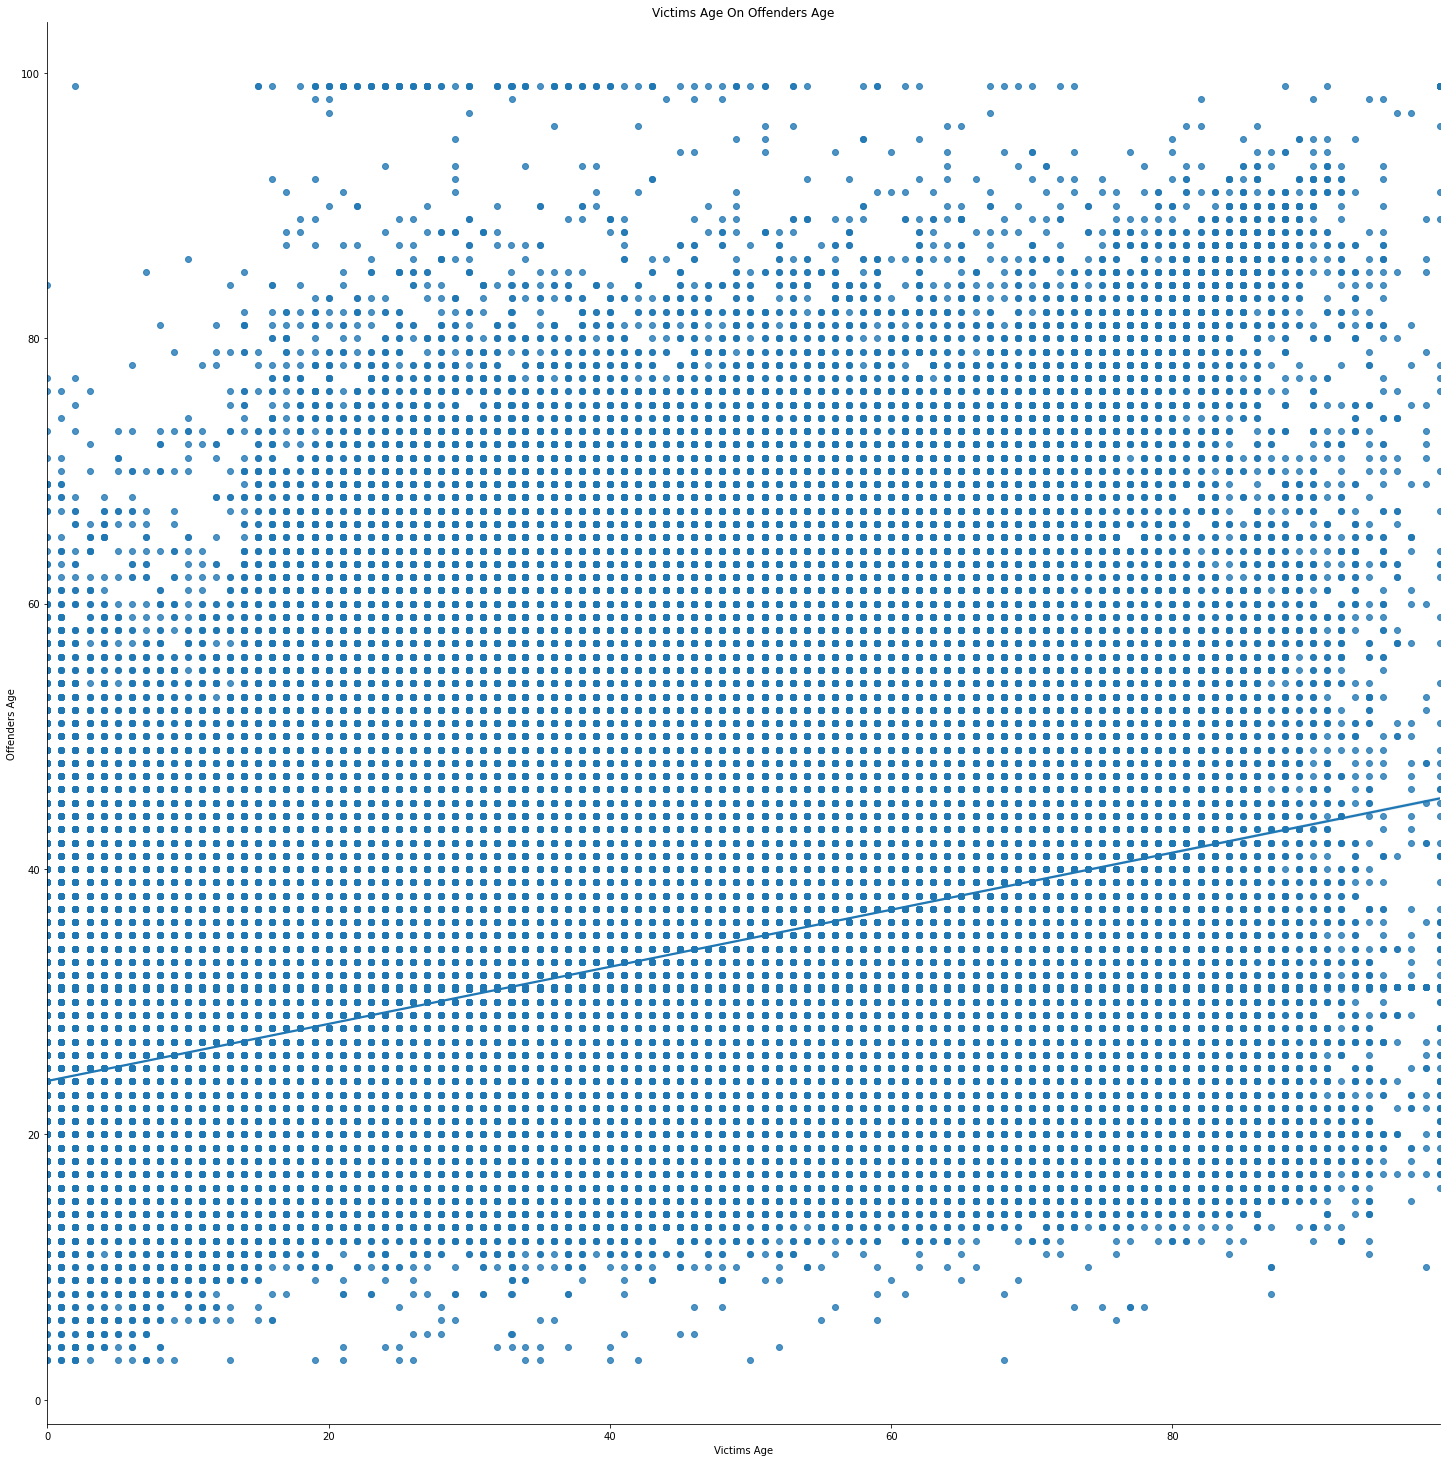

In [47]:
# Creating a Scatterplot
sns.lmplot(data = df_hr, x= 'VicAge', y= 'OffAge',
              height = 20, aspect = 1)

plt.title('Victims Age On Offenders Age')
plt.xlabel('Victims Age')
plt.ylabel('Offenders Age')

### Pair Plot

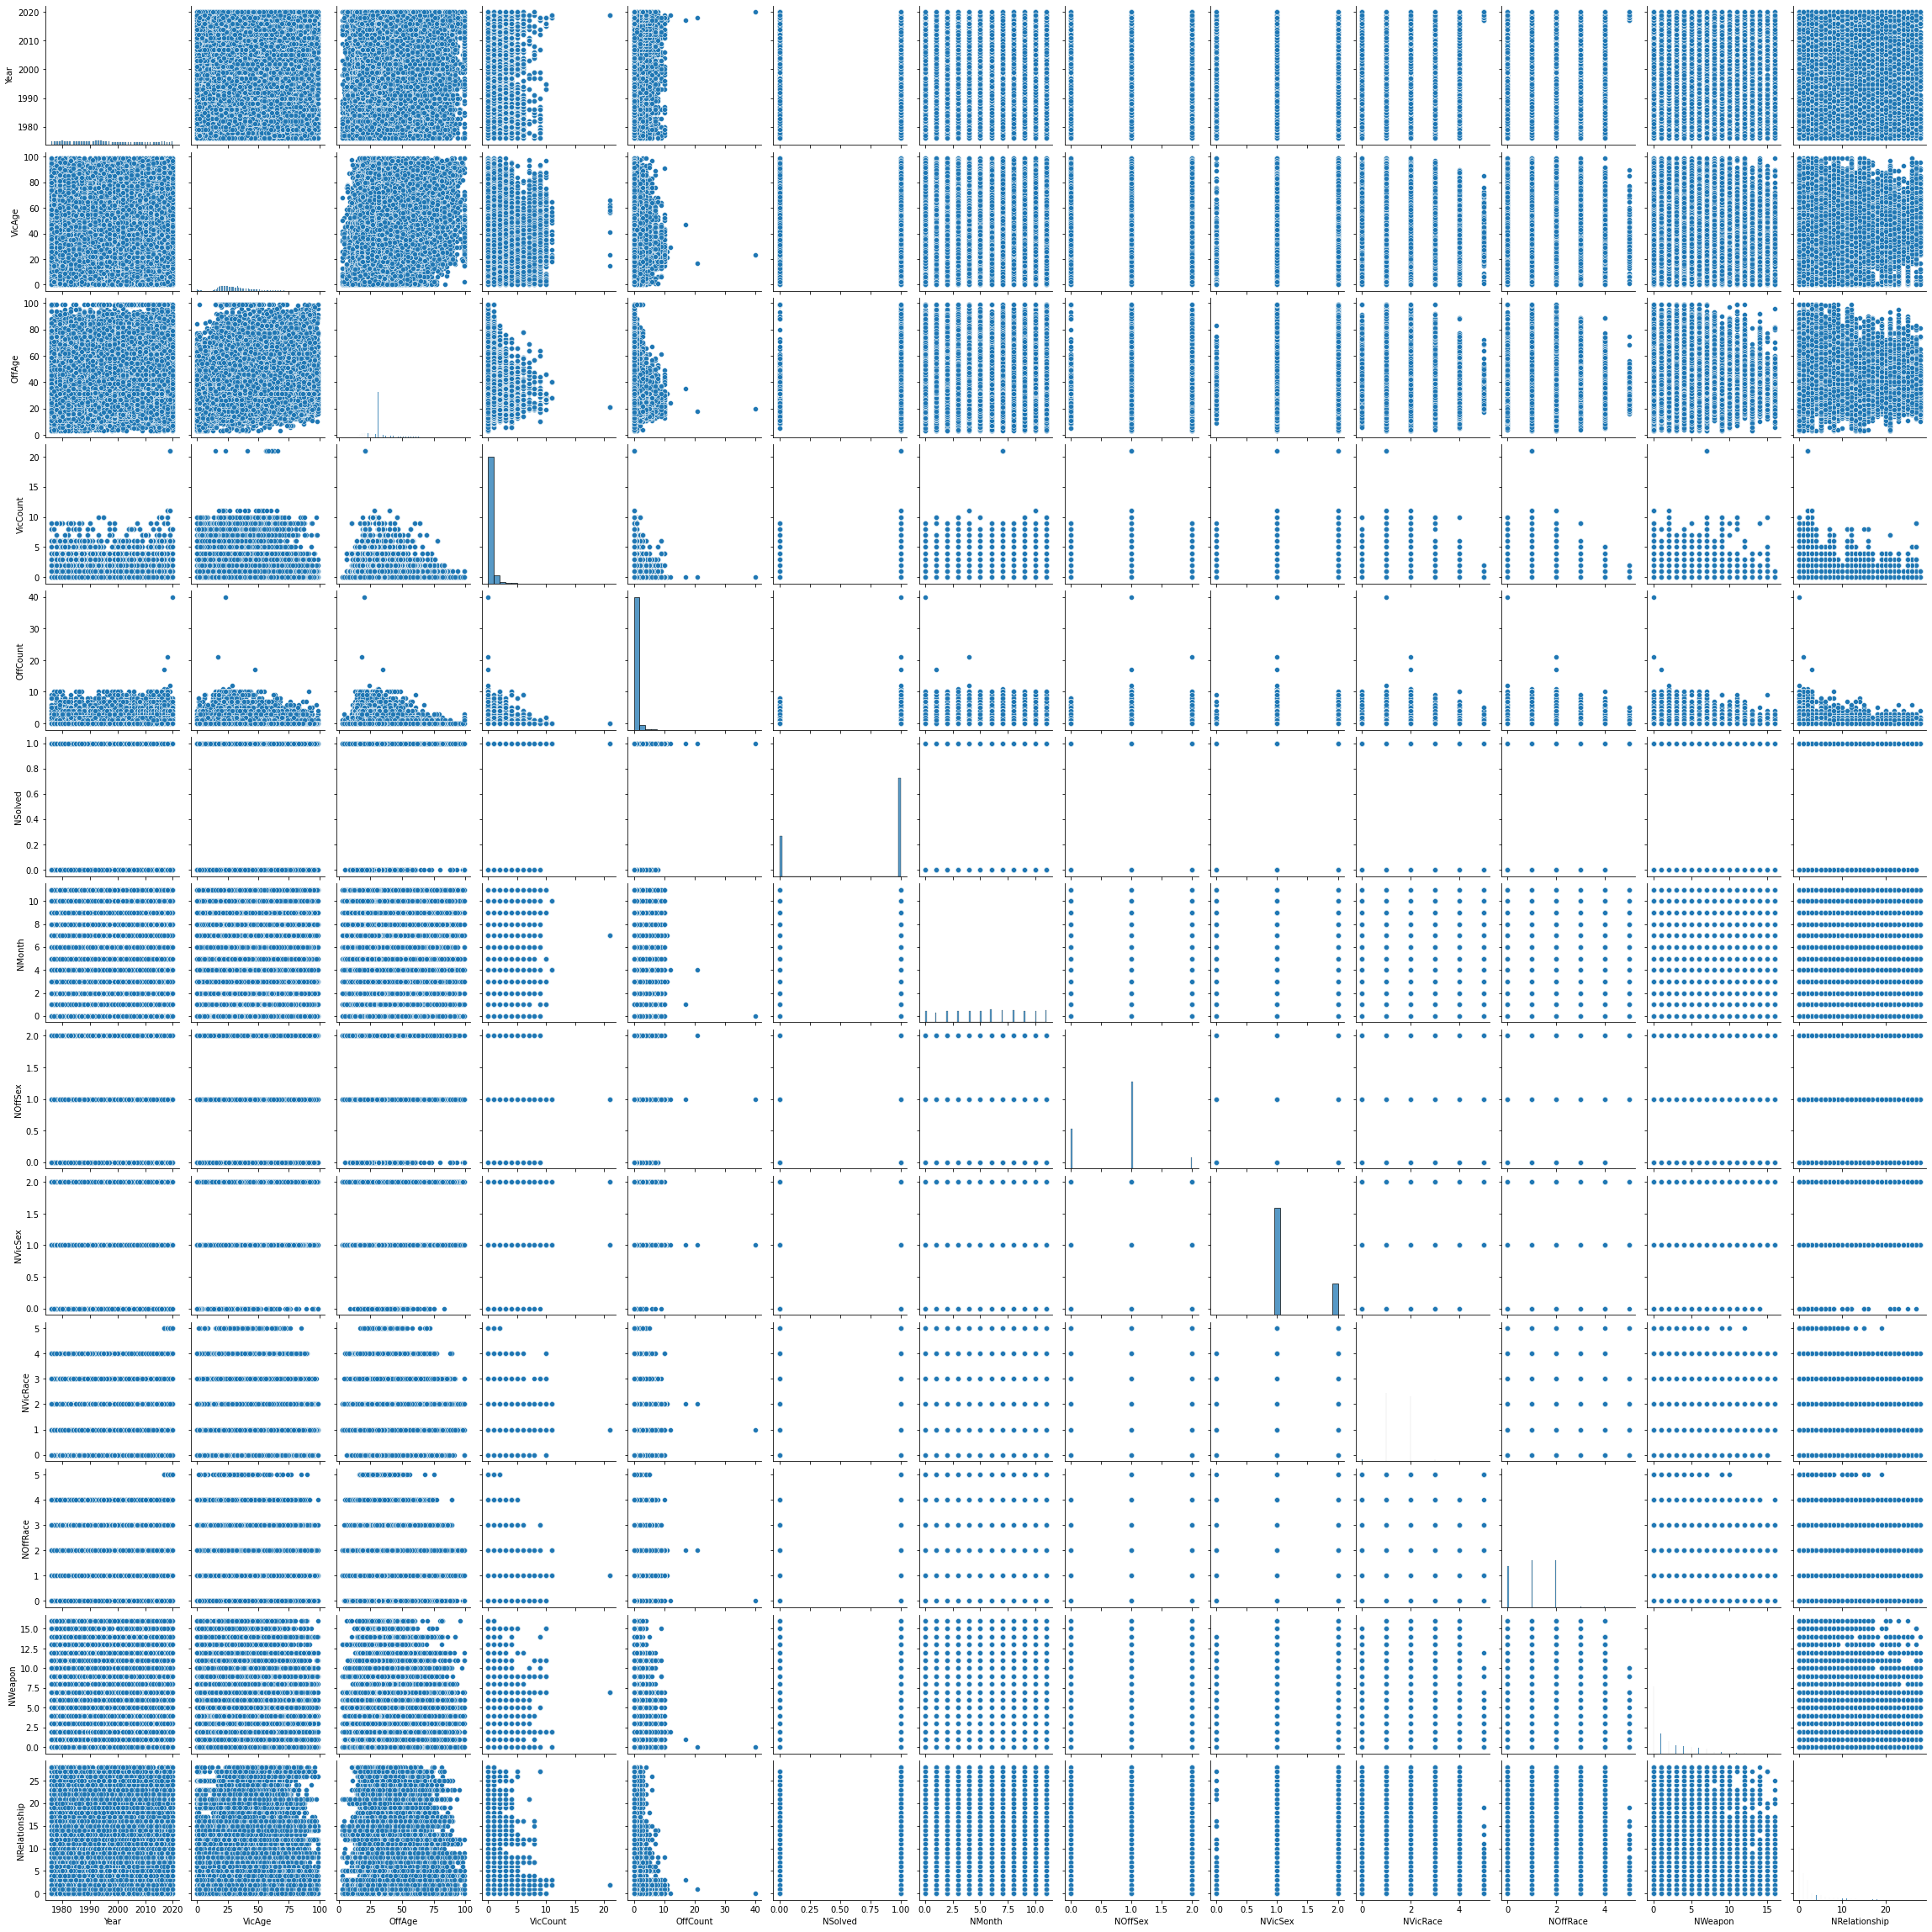

In [48]:
pair_plot = sns.pairplot(sub)

There isn't much of a diffrence between this and the correlation heatmap. However, it is interesting to see the graphs between the Relationships tables and the additional victims count and the additional offenders count.

In [98]:
# Created a subplot of columns Year, VicAge, OffAge, VicCount, OffCount
sub_2 = df_hr[['Year', 'VicAge', 'OffAge', 'VicCount','OffCount']]

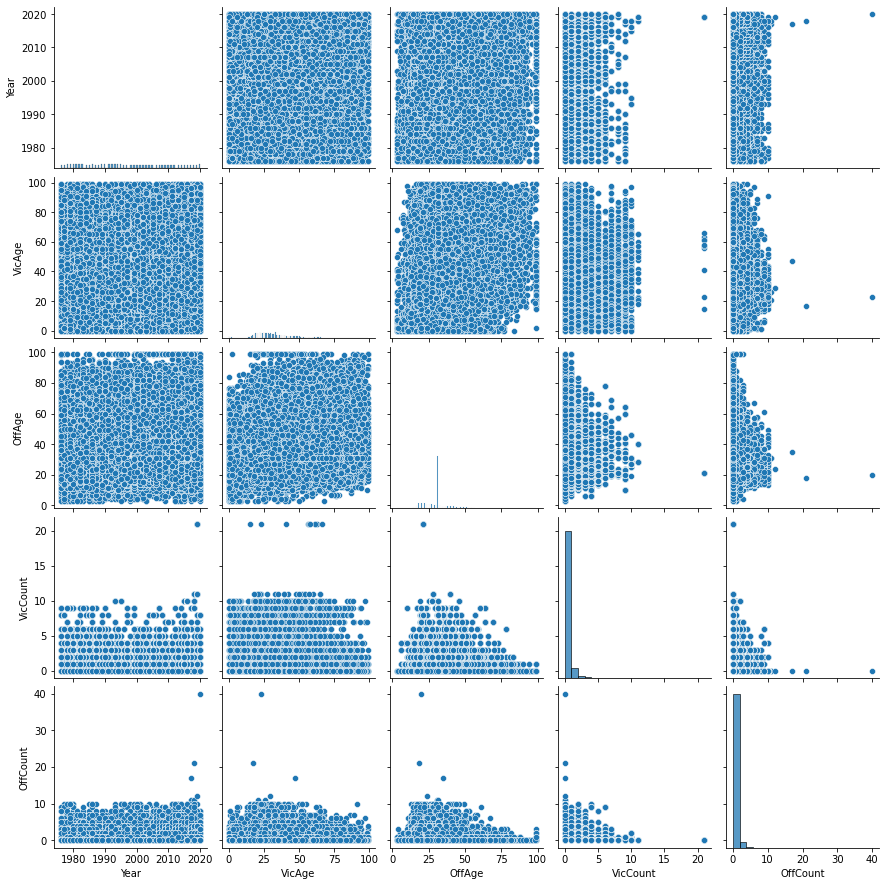

In [99]:
pair_plot = sns.pairplot(sub_2)

I wanted to showcase only the variables that weren't objects converted to int64. This is important as this data is actually a bunch of numerical values, while the other weren't.

### Categorical Plot

Does age play a role in the number of victims attacked?

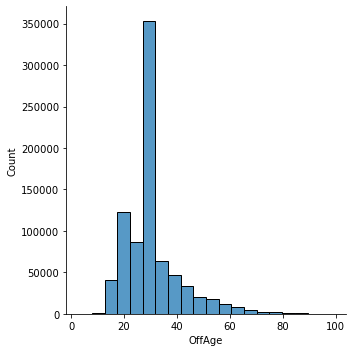

In [102]:
# Using a histogram to visualize the distribution of the variables in OffAge
sns.displot(df_hr['OffAge'], bins = 20)

In [108]:
# Creating conditions for Age_Category: Underage Attacker
df_hr.loc[df_hr['OffAge'] < 18, 'Age_Category'] = 'Underage Attacker'

In [109]:
# Creating conditions for Age_Category: Young-Adult Attacker
df_hr.loc[(df_hr['OffAge'] >= 18) & (df_hr['OffAge'] < 31), 'Age_Category'] = 'Young-Adult Attacker'

In [110]:
# Creating conditions for Age_Category: Adult Attacker
df_hr.loc[(df_hr['OffAge'] >= 31) & (df_hr['OffAge'] < 45), 'Age_Category'] = 'Adult Attacker'

In [111]:
# Creating conditions for Age_Category: Middle-Aged Attacker
df_hr.loc[(df_hr['OffAge'] >= 45) & (df_hr['OffAge'] < 65), 'Age_Category'] = 'Middle-Aged Attacker'

In [114]:
# Creating conditions for Age_Category: Elderly Attacker
df_hr.loc[df_hr['OffAge'] >= 65, 'Age_Category'] = 'Elderly Attacker'

In [115]:
# Checking the value counts for Age_category
df_hr['Age_Category'].value_counts(dropna = False)

Adult Attacker          413466
Young-Adult Attacker    280099
Middle-Aged Attacker     68882
Underage Attacker        41990
Elderly Attacker         13272
Name: Age_Category, dtype: int64

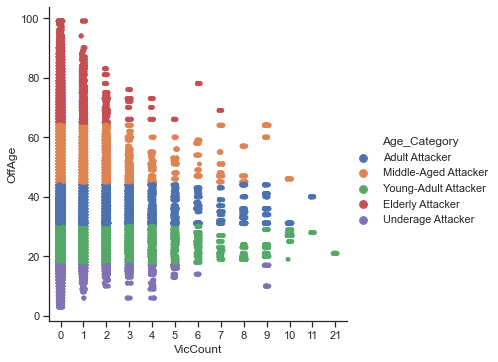

In [117]:
# Creating a categorical plot in seaborn using the Age_Category created above
sns.set(style="ticks")
g = sns.catplot(data = df_hr, x="VicCount", y="OffAge", hue="Age_Category")

From this graph I can tell that young adults and adults have an increase in victims. This is noticable as the green and blue are more dominate on the right side of the graph. However, this is not positively correlated.

### Reflections & Hypothesis

#### Reflections

Because the data I've chosen doesn't contain many continuous variables, it made this task hard to answer the questions I wrote in the previous assignment. I believe the best way to answer my questions is by utilizing Tableau. However, I understand the necessity of Python. With that said, I feel like I've uncovered some resourceful insights.
- There is a very small correlation between the offenders age and victims age. Meaning the offender was roughly around the same age as the victim when attacked.

Additional Questions:
- Does age play a role in the number of victims attacked?
- Does the offenders age and sex really play that large of a role in solved cases?
    - If so why?

#### Hypothesis

Like I had mentioned earlier, I would like to do a little more analysis comparing objective variables to determine more of a hypothesis. However, here are some of my thoughts on the bases of this anyalis:
- More poeple commit homicide in larger cities.
- The younger the attacker the more likely it is a family homicide caused by an accident.